Importing all libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel("/content/customer_churn_large_dataset.xlsx")

In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [6]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

no duplicates present

droping name and customerid

In [7]:
df=df.drop(['Name','CustomerID'], axis=1)

Exploratory Data Analysis

In [8]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [9]:
df['Location'].describe()

count      100000
unique          5
top       Houston
freq        20157
Name: Location, dtype: object

In [10]:
df['Location'].value_counts()

Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

<Axes: ylabel='Location'>

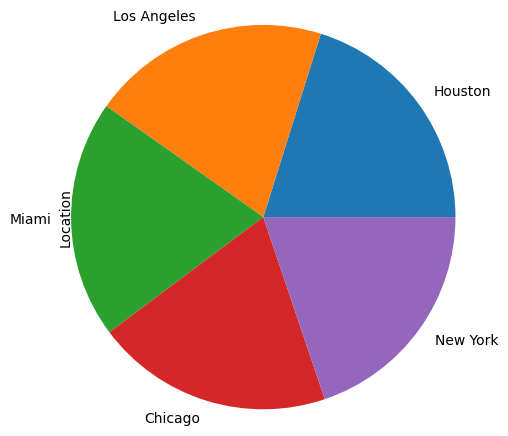

In [11]:
df['Location'].value_counts().plot.pie(radius = 1.3)

<Axes: ylabel='Gender'>

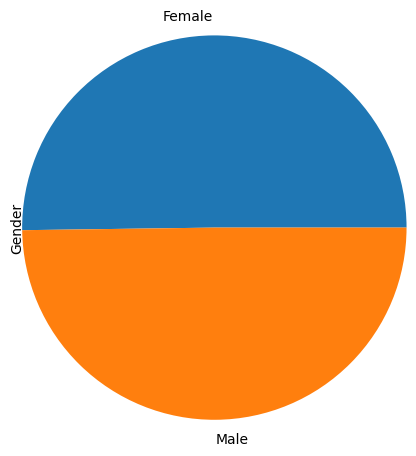

In [12]:
df['Gender'].value_counts().plot.pie(radius = 1.3)

50% male and 50% female

outliers

In [13]:
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB']

# Calculate Q1 and Q3
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

potential_outliers_df = df[
    (df['Age'] < lower_bound['Age']) | (df['Age'] > upper_bound['Age']) |
    (df['Subscription_Length_Months'] < lower_bound['Subscription_Length_Months']) | (df['Subscription_Length_Months'] > upper_bound['Subscription_Length_Months']) |
    (df['Monthly_Bill'] < lower_bound['Monthly_Bill']) | (df['Monthly_Bill'] > upper_bound['Monthly_Bill']) |
    (df['Total_Usage_GB'] < lower_bound['Total_Usage_GB']) | (df['Total_Usage_GB'] > upper_bound['Total_Usage_GB'])
]

In [14]:
potential_outliers_df

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn


result no outliers present

Encoding

In [15]:
# Use one-hot encoding to encode the "Location" and "Gender" columns
df_encoded = pd.get_dummies(df, columns=['Location', 'Gender'], prefix=['Location', 'Gender'])

In [16]:
df_encoded.head(2)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male
0,63,17,73.36,236,0,0,0,1,0,0,0,1
1,62,1,48.76,172,0,0,0,0,0,1,1,0


In [17]:
churn_column = df_encoded.pop("Churn")

# Add the "Churn" column back to the DataFrame as the right-most column
df_encoded["Churn"] = churn_column

In [18]:
df_encoded.sample(2)

,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Location_Chicago,Location_Houston,Location_Los Angeles,Location_Miami,Location_New York,Gender_Female,Gender_Male,Churn
36347,45,11,63.38,346,1,0,0,0,0,0,1,0
12488,59,12,97.86,455,0,0,0,0,1,1,0,0


In [19]:
correlation_matrix = df_encoded.corr()

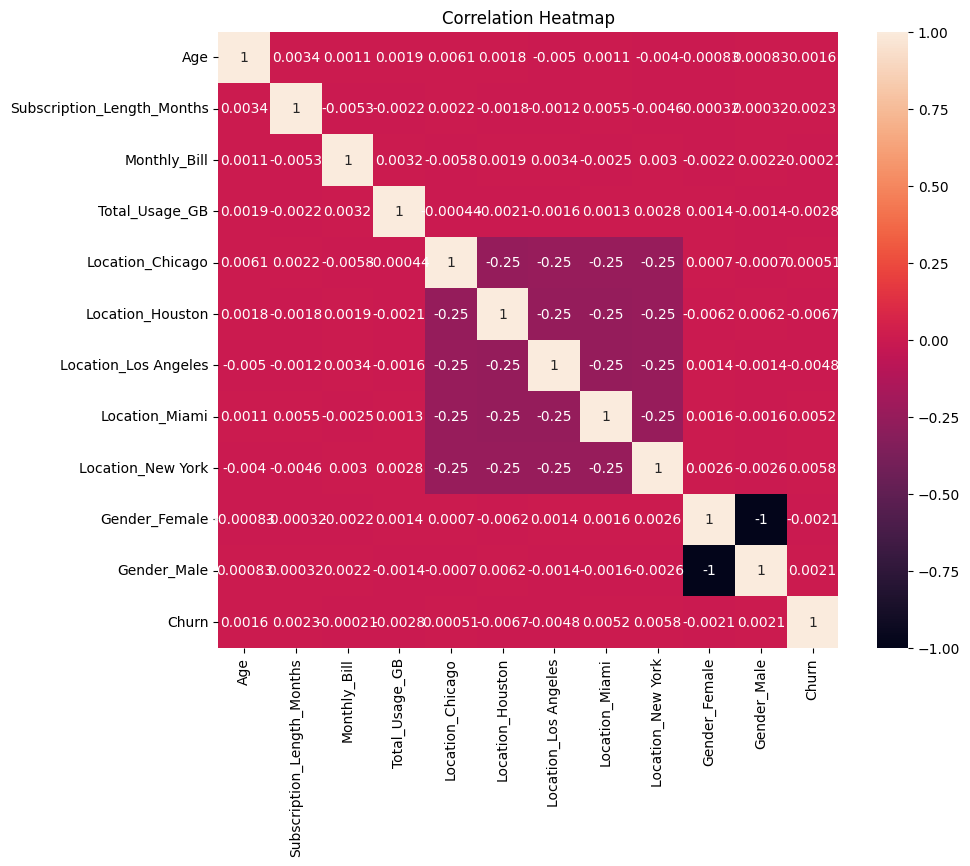

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation Heatmap")
plt.show()

spliting data set

In [22]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Importing models

In [23]:
!pip install xgboost

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score

In [25]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [26]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [27]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    re=recall_score(y_test,y_pred)

    return accuracy,precision,f1,re

In [30]:
# creating array of accuracy_scores,precision_scores,f1_scores and recall_scores
accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []


for name, clf in clfs.items():
    current_accuracy, current_precision,current_f1,current_recall = train_classifier(clf, X_train, y_train, X_test, y_test)

    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    print("F1 Score - ", current_f1)
    print("Recall - ", current_recall)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)  # Append F1 score to the list
    recall_scores.append(current_recall)


For  SVC
Accuracy -  0.50395
Precision -  0.0
F1 Score -  0.0
Recall -  0.0
For  KN
Accuracy -  0.49645
Precision -  0.49234068627450983
F1 Score -  0.48911885557753765
Recall -  0.4859389174478379
For  NB
Accuracy -  0.5043
Precision -  0.5003631082062454
F1 Score -  0.49314928425357873
Recall -  0.4861405100292309
For  DT
Accuracy -  0.49575
Precision -  0.49119793902962644
F1 Score -  0.47574985704631695
Recall -  0.46124382622719484
For  LR
Accuracy -  0.5041
Precision -  0.5001992825827023
F1 Score -  0.43156808803301244
Recall -  0.37949803447233144
For  RF
Accuracy -  0.4945
Precision -  0.48988114359139096
F1 Score -  0.47507788161993775
Recall -  0.46114302993649836
For  AdaBoost
Accuracy -  0.50355
Precision -  0.49954954954954955
F1 Score -  0.4718897930961119
Recall -  0.4471323455296845
For  BgC
Accuracy -  0.50515
Precision -  0.5013020833333334
F1 Score -  0.4828343000470294
Recall -  0.46567886301784095
For  ETC
Accuracy -  0.4937
Precision -  0.48914079881343364
F1 Sco

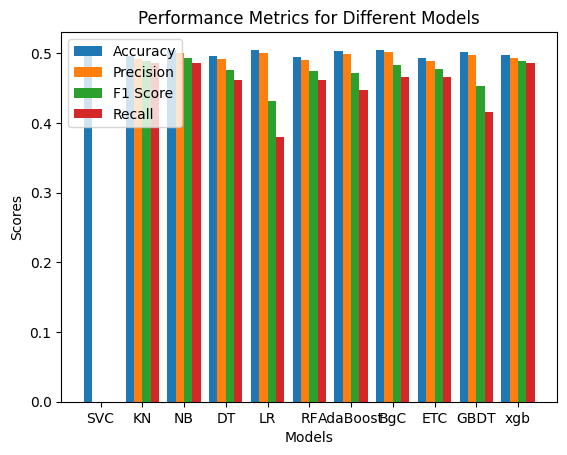

In [31]:
# Models or scenarios names
models = ['SVC','KN','NB','DT','LR','RF','AdaBoost','BgC','ETC','GBDT','xgb']
# Create a plot to visualize the scores
fig, ax = plt.subplots()

# Bar width
bar_width = 0.2
bar_positions = list(range(len(models)))
ax.bar(bar_positions, accuracy_scores, width=bar_width, label='Accuracy')
ax.bar([pos + bar_width for pos in bar_positions], precision_scores, width=bar_width, label='Precision')
ax.bar([pos + 2*bar_width for pos in bar_positions], f1_scores, width=bar_width, label='F1 Score')
ax.bar([pos + 3*bar_width for pos in bar_positions], recall_scores, width=bar_width, label='Recall')

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics for Different Models')
ax.set_xticks([pos + 1.5*bar_width for pos in bar_positions])
ax.set_xticklabels(models)
ax.legend()

# Display the graph
plt.show()

ANN Model

In [32]:
!pip install tensorflow

In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

In [34]:
# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
# Build the ANN model
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(128, activation='relu'),      # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),       # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(1, activation='sigmoid')      # Output layer with 1 neuron and sigmoid activation (binary classification)
])

In [36]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
2000/2000 [==============================] - 10s 4ms/step - loss: 0.6953 - accuracy: 0.4983 - val_loss: 0.6936 - val_accuracy: 0.4964
Epoch 2/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6933 - accuracy: 0.5031 - val_loss: 0.6933 - val_accuracy: 0.5004
Epoch 3/50
2000/2000 [==============================] - 5s 3ms/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6933 - val_accuracy: 0.4984
Epoch 4/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.6936 - val_accuracy: 0.4942
Epoch 5/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6931 - accuracy: 0.5077 - val_loss: 0.6936 - val_accuracy: 0.4976
Epoch 6/50
2000/2000 [==============================] - 5s 2ms/step - loss: 0.6930 - accuracy: 0.5091 - val_loss: 0.6939 - val_accuracy: 0.4933
Epoch 7/50
2000/2000 [==============================] - 4s 2ms/step - loss: 0.6929 - accuracy: 0.5086 - val_loss: 0.6938 - val_accuracy

In [38]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

625/625 [==============================] - 3s 5ms/step - loss: 0.6997 - accuracy: 0.4987


In [39]:
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.4987
